In [1]:
%load_ext autoreload
%autoreload 2


import argparse
from pylab import *
import os
#from utilities import audio_utilities
import pdb
import librosa
import IPython.display as ipd

import sys
from pathlib import Path

try:
    sys.path.append(str(Path().cwd().parent.parent))
    sys.path.append(str(Path().cwd()))
except IndexError:
    pass

#import utils.audio as a
#import utils.plots as plots
import utils as utils

utils.misc.change_docker_cwd("./synthesizer/full_audio")

In [2]:
PATH = '../../datasets/dataset_laughter_single_22050/'
SR = 22050 


In [3]:
audio_example = PATH + '_547JTmvb9g_enc.wav'
input_signal, sr = librosa.load(audio_example)
ipd.Audio(input_signal, rate=SR) #

In [4]:
input_signal, sr = utils.audio.loadAudio(audio_example, sr=SR)
utils.audio.playAudio(input_signal, sr)

In [16]:
# load data
import glob
for filepath in glob.iglob(PATH + "*"):
    print(filepath)

../../datasets/dataset_laughter_single_22050/1-36164-A-26_enc.wav
../../datasets/dataset_laughter_single_22050/4-181599-A-26_enc.mel
../../datasets/dataset_laughter_single_22050/1-36164-B-26_enc.mel
../../datasets/dataset_laughter_single_22050/1-72695-A-26_enc.mel
../../datasets/dataset_laughter_single_22050/yc2X4I-KiZA_enc.wav
../../datasets/dataset_laughter_single_22050/3-118487-A-26_enc.mel
../../datasets/dataset_laughter_single_22050/2-79775-A-26_enc.mel
../../datasets/dataset_laughter_single_22050/3-119459-A-26_enc.mel
../../datasets/dataset_laughter_single_22050/5-244526-A-26_enc.mel
../../datasets/dataset_laughter_single_22050/D-1RsAdzIcc_enc.wav
../../datasets/dataset_laughter_single_22050/2-109759-B-26_enc.mel
../../datasets/dataset_laughter_single_22050/3-118487-A-26_enc.wav
../../datasets/dataset_laughter_single_22050/1-1791-A-26_enc.wav
../../datasets/dataset_laughter_single_22050/1-36164-A-26_enc.mel
../../datasets/dataset_laughter_single_22050/3-110536-A-26_enc.mel
../../

In [5]:
LABELS = "../../datasets/dataset_laughter_single_22050.csv"
input_df = utils.misc.readCSV(LABELS)
input_df.head()


Filename  Gender  Count      Type  Enthusiasm
0   _547JTmvb9g_enc  female      1  laughter           3
1   1-1791-A-26_enc     mix      2    giggle           1
2  1-33658-A-26_enc  female      1  laughter           1
3  1-36164-A-26_enc  female      1    giggle           1
4  1-36164-B-26_enc  female      1  laughter           2

In [6]:
# get female laughter
idx_female = input_df.index[input_df['Gender'] == 'female']
females = input_df.iloc[idx_female]
print(females)
print(females.iloc[0])
print(input_df.iloc[0].Filename)

             Filename  Gender  Count      Type  Enthusiasm
0     _547JTmvb9g_enc  female      1  laughter           3
2    1-33658-A-26_enc  female      1  laughter           1
3    1-36164-A-26_enc  female      1    giggle           1
4    1-36164-B-26_enc  female      1  laughter           2
5    1-72695-A-26_enc  female      1  laughter           2
6    1-73123-A-26_enc  female      1  laughter           1
8    2-79775-A-26_enc  female      1  laughter           2
9   2-109759-A-26_enc  female      1  laughter           1
10  2-109759-B-26_enc  female      1  laughter           2
11  3-107123-A-26_enc  female      1  laughter           3
12  3-110536-A-26_enc  female      1  laughter           2
13  3-118487-A-26_enc  female      1  laughter           3
15  3-152912-A-26_enc  female      1  laughter           2
16  3-152997-A-26_enc  female      1  laughter           1
17  4-181599-A-26_enc  female      1  laughter           3
24    D-1RsAdzIcc_enc  female      1    giggle          

In [7]:
# Play example female laughter
 
utils.audio.playAudio(audio_female, sr)

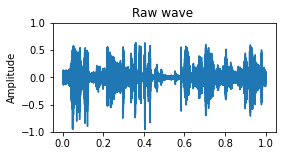

In [8]:
utils.plots.plotAudio(audio_female, figsize=(4, 2))

In [9]:
# get male laughter
idx_male = input_df.index[input_df['Gender'] == 'male']
males = input_df.iloc[idx_male]
print(males.Filename)
print(males.index)

7      2-79769-A-26_enc
14    3-119459-A-26_enc
20    5-244526-A-26_enc
21    5-259514-A-26_enc
22    5-263775-A-26_enc
23    5-263775-B-26_enc
25      THhP1idrWXA_enc
Name: Filename, dtype: object
Int64Index([7, 14, 20, 21, 22, 23, 25], dtype='int64')


### Load dataset

In [10]:

dataset = []
for i in np.arange(len(input_df)):
    audio, sr = utils.audio.loadAudio(PATH + input_df.iloc[i].Filename + '.wav', sr=SR, fix_length=True, length=10)
    dataset.append(audio)


In [11]:
dataset[0]

array([ 0.03189087,  0.02835083,  0.02655029, ...,  0.04492188,
       -0.0446167 , -0.07196045], dtype=float32)

### Play example male laughter

In [12]:
audio_male, sr = utils.audio.loadAudio(PATH + males.iloc[0].Filename + '.wav', sr=SR)
utils.audio.playAudio(audio_male, sr)

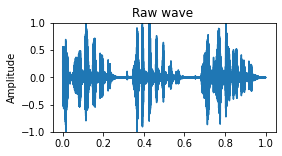

In [13]:
utils.plots.plotAudio(audio_male, figsize=(4, 2))

### Add White Noise


In [14]:
audio_wnoise = utils.audio.addNoise(audio_male, noise_factor=0.003)
utils.audio.playAudio(audio_wnoise, sr)

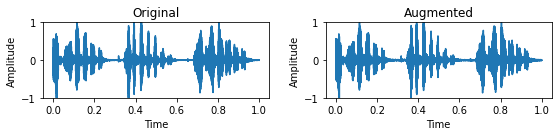

In [15]:
utils.plots.plotAudioPair(audio_male, audio_wnoise, figsize=(8, 2), ylim=True)

### Shift Audio in Time
Shift audio to left/right with a random second 
 
if shifting audio to left (fast forward) with x seconds, first x seconds will mark as 0 (i.e. silence). If shifting audio to right (back forward) with x seconds, last x seconds will mark as 0 (i.e. silence)

In [16]:
# shift in seconds
shift_max = 4 # in seconds
shift = np.random.randint(sr * shift_max)
direction = "left" if np.random.randint(0, 2) else "right"
audio_shifted = utils.audio.addShift(audio_male, shift, direction)
utils.audio.playAudio(audio_shifted, sr)

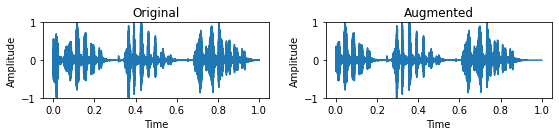

In [17]:
#util.plotAudio(audio_shifted, figsize=(4, 2))
utils.plots.plotAudioPair(audio_male, audio_shifted, figsize=(8, 2), ylim=True, horizontal=True)


### Change Pitch
 

In [18]:
# pitch factor -> how many half-steps to shift y
pitch_factor = np.random.randint(-6, 6) # pitch > 0 higher pitch, else deeper voice

audio_wpitch = utils.audio.changePitch(audio_male, sr, pitch_factor=-6)
utils.audio.playAudio(audio_wpitch, sr)

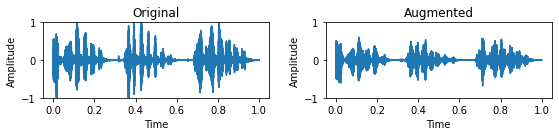

In [19]:
utils.plots.plotAudioPair(audio_male, audio_wpitch, figsize=(8, 2), ylim=True)

### Change Speed

In [20]:
print(audio_male.shape)
audio_wspeed = utils.audio.changeSpeed(audio_male, 0.5, keep_dim=True)
utils.audio.playAudio(audio_wspeed, sr)

(110250,)


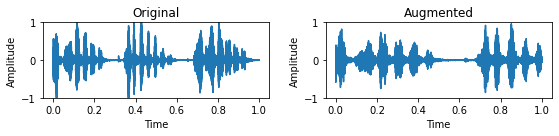

In [21]:
utils.plots.plotAudioPair(audio_male, audio_wspeed, figsize=(8, 2), ylim=True)

## Create crowd laughter

In [22]:

noise_factor = np.random.rand() * 0.003 
shift_max = np.random.rand() * 3 # in seconds
#print(shift_max)
shift = np.random.randint(int(sr * shift_max))

direction = "left" if np.random.randint(0, 2) else "right"
pitch_factor = np.random.randint(-6, 6) # pitch > 0 higher pitch, else deeper voice

min_speed, max_speed = 0.75, 1.5
speed_range = (max_speed - min_speed)  # 2
speed_factor = np.random.rand() * speed_range + min_speed

audio_augmented = utils.audio.augmentAudio(audio_male, SR, noise_factor, shift, direction, pitch_factor, speed_factor)
utils.audio.playAudio(audio_augmented, sr)


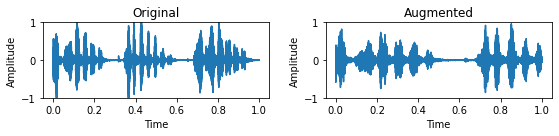

In [23]:
utils.plots.plotAudioPair(audio_male, audio_wspeed, figsize=(8, 2), ylim=True)

### Version 1 

In [24]:
t = time.time()
N = 100
FEMALE_RATIO = 0.7
# in percent
len_dataset = len(dataset)
min_speed, max_speed = 0.75, 1.5
speed_range = (max_speed - min_speed)  # 2
max_noise = 0.003 
min_pitch, max_pitch = -6, 6
audio = np.zeros_like(dataset[0])

idx_list = utils.misc.getRandomDistribution(input_df, N)
idx_list = utils.misc.getGenderDistribution(input_df, FEMALE_RATIO, N)

for idx in idx_list:
    
    noise_factor = np.random.rand() * max_noise
    shift_max = np.random.rand() * 3 # in seconds
    #print(shift_max)
    shift = np.random.randint(int(SR * shift_max))
    direction = "left" if np.random.randint(0, 2) else "right"
    pitch_factor = np.random.randint(min_pitch, max_pitch) # pitch > 0 higher pitch, else deeper voice
    speed_factor = np.random.rand() * speed_range + min_speed
       
    audio += utils.audio.augmentAudio(dataset[idx], SR, noise_factor, shift, direction, pitch_factor, speed_factor)
audio /= N

elapsed = time.time() - t
print(elapsed)

24.484153509140015


### Version 2

In [25]:
from multiprocessing import Pool

t = time.time()
N = 100
FEMALE_RATIO = 0.7
# in percent
len_dataset = len(dataset)
min_speed, max_speed = 0.75, 1.5
speed_range = (max_speed - min_speed)  # 2
max_noise = 0.003 
min_pitch, max_pitch = -6, 6
audio = np.zeros_like(dataset[0])

idx_list = utils.misc.getRandomDistribution(input_df, N)
#print(idx_list)
idx_list = utils.misc.getGenderDistribution(input_df, FEMALE_RATIO, N)

#pdb.set_trace()
noise_factor = list(np.random.rand(N) * max_noise)
shift_max = np.random.rand(N) * 3 # in seconds
shift = [np.random.randint(0, int(SR * i)) for i in shift_max]
direction = ["left" if np.random.randint(0, 2) else "right" for i in np.arange(N)] 
pitch_factor = list(np.random.randint(min_pitch, max_pitch, N)) # pitch > 0 higher pitch, else deeper voice
speed_factor = list(np.random.rand(N) * speed_range + min_speed)
data = [dataset[idx] for idx in idx_list] 

#create arguments as list for parallel computing
func_args = [(data[i], SR, noise_factor[i], shift[i], direction[i], pitch_factor[i], speed_factor[i]) for i in np.arange(N)]
    
#multiprocessing
with Pool(8) as p:
    out = p.starmap(utils.audio.augmentAudio, func_args)
audio = np.array(out)
#pdb.set_trace()
audio = np.mean(audio, 0)

elapsed = time.time() - t
print(elapsed)

4.889421463012695


### Version 3

In [68]:
t = time.time()
N = 100
FEMALE_RATIO = 0.5
# in percent
len_dataset = len(dataset)
min_speed, max_speed = 0.75, 1.5
speed_range = (max_speed - min_speed)  # 2
max_noise = 0.003 
min_pitch, max_pitch = -6, 6
audio = np.zeros_like(dataset[0])

swell = 2 # in seconds
fade = 4 # in seconds

audio_left = np.zeros(10*SR)
audio_right = np.zeros(10*SR)

idx_list = utils.misc.getRandomDistribution(input_df, N)
idx_list = utils.misc.getGenderDistribution(input_df, FEMALE_RATIO, N)

for idx in idx_list:
    
    noise_factor = np.random.rand() * max_noise
    shift_max = np.random.rand() * 3 # in seconds
    #print(shift_max)
    shift = np.random.randint(int(SR * shift_max))
    direction = "left" if np.random.randint(0, 2) else "right"
    pitch_factor = np.random.randint(min_pitch, max_pitch) # pitch > 0 higher pitch, else deeper voice
    speed_factor = np.random.rand() * speed_range + min_speed
    
    swell_ = np.random.rand()*swell
    fade_ =  np.random.rand()*fade
    #print(swell)
    envelope = utils.audio.createEnvelope(len(dataset[0]), SR, swell_, fade_)
    augmented_audio = utils.audio.augmentAudio(dataset[idx], SR, noise_factor, shift, direction, pitch_factor, speed_factor)
    audio += np.multiply(envelope, augmented_audio)
audio /= N

elapsed = time.time() - t
print(elapsed)

23.959826707839966


22050
220500
220500


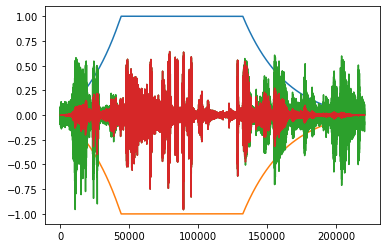

In [35]:
swell = 2 # in seconds
fade = 4 # in seconds
print(SR)
temp = dataset[0]
env = utils.audio.createEnvelope(len(dataset[0]), SR, swell, fade)
print(len(temp))
t = np.linspace(0, len(temp)/SR, len(temp))
print(len(env))
plt.plot(env)
plt.plot(-env)
plt.plot(temp)
plt.plot(env*temp)


### Version 4 add Envelope, decay, and stereo (vectorized)

In [56]:
from multiprocessing import Pool

t = time.time()
N = 10
FEMALE_RATIO = 0.5
# in percent
len_dataset = len(dataset)
min_speed, max_speed = 0.9, 1.3
speed_range = (max_speed - min_speed)  # 2
max_noise = 0.001 
min_pitch, max_pitch = -4, 4
audio = np.zeros_like(dataset[0])

idx_list = utils.misc.getRandomDistribution(input_df, N)
#print(idx_list)
idx_list = utils.misc.getGenderDistribution(input_df, FEMALE_RATIO, N)
# add radial decay
alpha=np.random.rand(N)
beta=np.reciprocal(np.sqrt(np.arange(1, N+1)))

#pdb.set_trace()
noise_factor = list(np.random.rand(N) * max_noise)
shift_max = np.random.rand(N) * 3 # in seconds
shift = [np.random.randint(0, int(SR * i)) for i in shift_max]
direction = ["left" if np.random.randint(0, 2) else "right" for i in np.arange(N)] 
pitch_factor = list(np.random.randint(min_pitch, max_pitch, N)) # pitch > 0 higher pitch, else deeper voice
speed_factor = list(np.random.rand(N) * speed_range + min_speed)
data = [dataset[idx] for idx in idx_list] 

#create arguments as list for parallel computing
func_args = [(data[i], alpha[i], beta[i], SR, noise_factor[i], shift[i], direction[i], pitch_factor[i], speed_factor[i]) for i in np.arange(N)]
    
#multiprocessing
with Pool(8) as p:
    out = p.starmap(utils.audio.augmentAudioStereo, func_args)

#pdb.set_trace()
audio = np.array(out).mean(0) # two channel audio
elapsed = time.time() - t
print(elapsed)

0.6883513927459717


In [51]:
# stereo audio with alpha, beta falloff
audio_100 = audio
utils.audio.playAudio(audio_100, sr)

In [57]:
# stereo audio with alpha, beta falloff
audio_10 = audio
utils.audio.playAudio(audio_10, sr)

In [165]:
util.playAudio(audio_20, sr)

In [95]:
audio_20 = audio

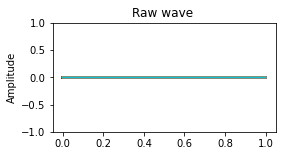

In [59]:
utils.plots.plotAudio(audio_100, figsize=(4, 2), ylim=True)

In [230]:
max(audio)

0.01904912